<a href="https://colab.research.google.com/github/emilytsen/hill_clibing/blob/main/Buscas_Prep_Giovis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Busca com subida da encosta(Hill Clibing)</h1>
<h2>Problema das N Rainhas</h2>
<p><b>Em um tabuleiro NxN deve ter N rainhas que não se atacam</b></p>
<p> F = Número de rainhas que não se atacam <br>
    Mínimo = 0 (Meta)<br>
    Máximo = Combinação de N 2 a 2 - COMB(N,2)<br>
    Para N = 8 <br>
    MAX = 8! / ((8-2)!*2!)-8*7/2 = 28 pares de rainhas que não se atacam
</p>

In [ ]:
# Configuração inicial
import logging as log
import sys


log.basicConfig(format='%(levalname)s : %(message)s', stream=sys.stdout)
root = log.getLogger()
root.setLevel(log.DEBUG)

logi = log.info
loge= log.error
logw = log.warning
logd = log.debug

In [ ]:
# import das bibliotecas
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
import math
import random
import copy
import itertools as it
TAMANHOTABULEIRODEFAULT = 8
DIRECAO =['norte','nordeste','leste','sudeste','sul', 'sudoeste','oeste','noroeste'] # Movimentos que podem ser feitos pela rainha

In [ ]:
# Gerar tabuleiro com matriz t por t de zeros com 1 (rainhas) na primeira coluna
def geraTabuleiro(tamanho):
    if tamanho<2: return[-1]
    tab = []
    for i in range(tamanho):
        l=[]
        for j in range(tamanho):
            l.append(0)
        tab.append(l)
    for i in range(tamanho): tab[i][0]=1
    return tab

In [ ]:
def printTabuleiro(tab):
    for i in tab:print(i)

In [ ]:
# Testar impressão do tabuleiro
printTabuleiro(geraTabuleiro(4))

[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]


In [ ]:
# Testar impressão do tabuleiro
printTabuleiro(geraTabuleiro(8))

[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Testar impressão do tabuleiro
printTabuleiro(geraTabuleiro(16))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Localiza rainhas
def locateQueens(estado):
    q=[]
    for i in range(len(estado)):
        for j in range(len(estado)):
            if estado[i][j] == 1: q.append((i,j))
    return q

In [ ]:
# Teste
print(locateQueens(geraTabuleiro(4)))

[(0, 0), (1, 0), (2, 0), (3, 0)]


In [ ]:
def calAtaques(estado):
    at=0
    atlinhas=0
    # ataque em linhas
    for i in estado:
        if sum(i)>1:
            atlinhas+=sum(i)-1
    at+=atlinhas

    # ataques em colunas
    atcolunas = 0
    for c in range(len(estado)):
        n1 = 0
        for l in range(len(estado)): n1 += estado[l][c]
        if n1>1:
            atcolunas += n1 - 1
    at+=atcolunas
    pr = locateQueens(estado)
    d=0
    # Ataques em diagonais
    for p, coords in enumerate(pr):
        i,j = coords
        # diagonal esquerda
        k,w = i+1,j-1
        while(w>=0 and k<len(estado)):
            if estado[k][w]==1:
                d+=1
                break
            w-=1
            k+=1
        # diagonal direita
        l,c = i+1, j+1
        while(1 < len(estado) and c<len(estado)):
            if estado[1][c]==1:
                d+=1
                break
            l+=1
            c+=1
    at+=d
    return at


In [ ]:
# Teste da calculadora de ataques
print(calAtaques(geraTabuleiro(4)))

3


In [ ]:
def moveRainhaAleatoria(estado, passo):
    tam=len(estado)
    while True:
        i,j = random.choice(locateQueens(estado))
        k = (j+passo)%tam
        if estado[i][k] == 0:
            estado[i][k],estado[i][j] = estado[i][j],estado[i][k]
            break
    return estado

In [ ]:
# teste Move Rainha
printTabuleiro(moveRainhaAleatoria(geraTabuleiro(4),5))

[1, 0, 0, 0]
[0, 1, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]


In [ ]:
def evolucaoFuncaoObjetivo(estado, passo, MAX):
  n = len(estado[0])
  ataques = []
  i = 0
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
  while i < MAX:
    atq = calAtaques(estado)
    ataques.append(maxAtaques-atq)
    if atq == 0:
      break
    estado = moveRainhaAleatoria(copy.deepcopy(estado), random.randint(1, len(estado)))
    i+=1
  x=range(len(ataques))
  plt.plot(x, ataques)
  plt.xlabel("Vizinhos Gerados")
  plt.ylabel("Função Objetivo")
  plt.title("Variação da Função Objetivo")
  plt.show()

In [ ]:
evolucaoFuncaoObjetivo(geraTabuleiro(8), 1, 500)


KeyboardInterrupt: 

In [ ]:
# Busca Hill Climbing
def buscaHC(estado, passo, MAX):
  c = 0
  n = len(estado[0])
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
  ataques = []
  change = True
  while c <= MAX:
    change = False
    atq = calAtaques(estado)
    ataques.append(maxAtaques - atq)
    if atq == 0: #é uma solução
      return "solução", estado, atq, ataques
    suc = moveRainhaAleatoria(copy.deepcopy(estado), passo)
    if calAtaques(suc) <= atq:
      estado = suc
      change = True
    c+=1
    if not change: c += 1
  return "não convergiu", estado, atq, ataques

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/pyth

função executada com  não convergiu
estado: 
[0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', name='Liberation Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


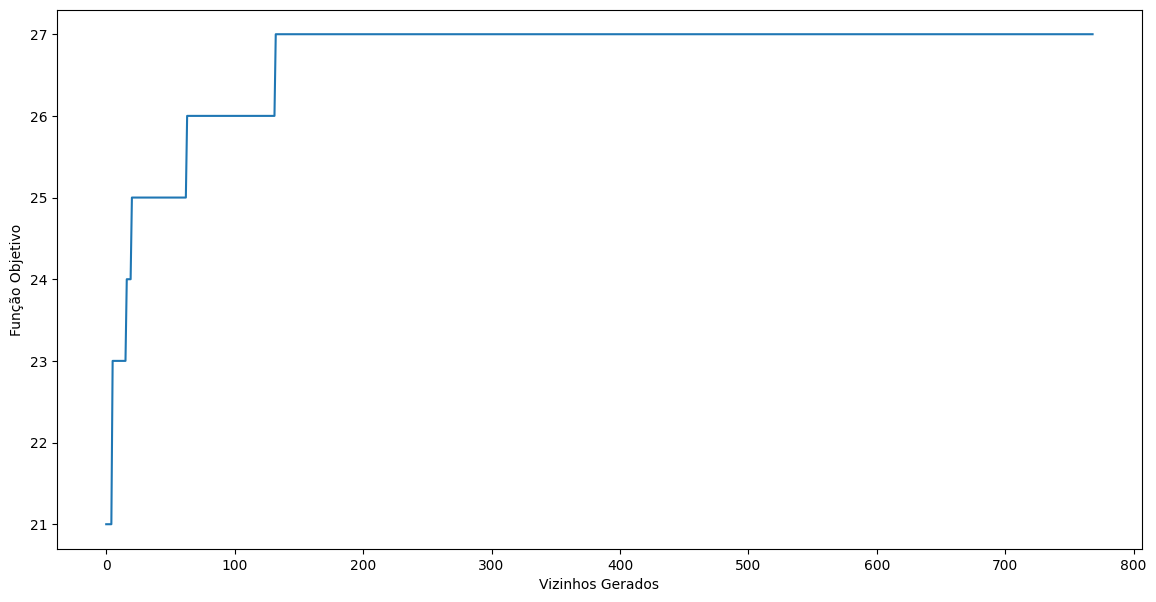

In [ ]:
#testando a busca por hil climbing
m, e, a, y = buscaHC(geraTabuleiro(8), 1,1500)
print("função executada com ", m)
print("estado: ")
printTabuleiro(e)
x = range(len(y))
plt.plot(x, y)
plt.xlabel("Vizinhos Gerados")
plt.ylabel("Função Objetivo")
plt.show()


27 é o numero mámimo de ataques evitados pelo modelo

In [ ]:
# gera tabuleito aleatorio posicionando as rainhas aleatoriamente
def geraTabuleiroAleatorio(tamanho):
  if tamanho<2: return[-1]
  tab = []
  for i in range(tamanho):
      l=[]
      for j in range(tamanho):
          l.append(0)
      tab.append(l)
  for i in range(tamanho):
    c = random.randint(0,tamanho-1)
    tab[i][c]=1
  return tab

In [ ]:
# hill climbing
for i in range(100):
  t = geraTabuleiroAleatorio(8)
  m, e, a, y = buscaHC(t, 1, 1500)
  if m == "solução":
    print("solução encontrada", i)
    printTabuleiro(e)
  else:
    print("{}", format(a), end=".")

{} 4.{} 2.{} 1.{} 4.{} 4.{} 6.{} 6.{} 6.{} 5.{} 1.{} 3.{} 4.{} 4.{} 5.{} 5.{} 1.{} 5.{} 5.{} 3.{} 1.{} 2.{} 2.{} 6.{} 6.{} 3.{} 6.{} 5.{} 4.{} 2.{} 1.{} 3.{} 5.{} 1.{} 2.{} 5.{} 1.solução encontrada 36
[0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
{} 5.{} 4.{} 2.{} 1.{} 3.{} 6.{} 3.{} 1.{} 1.{} 1.{} 2.{} 2.{} 1.{} 5.{} 1.{} 5.{} 5.{} 5.{} 1.{} 1.{} 2.{} 2.{} 1.{} 3.{} 6.{} 4.{} 5.{} 2.{} 7.{} 3.{} 3.{} 1.{} 7.{} 1.{} 4.{} 1.{} 2.{} 1.{} 4.{} 3.{} 2.{} 6.{} 4.{} 6.{} 1.{} 1.{} 4.{} 6.{} 5.{} 4.{} 1.{} 2.{} 4.{} 1.{} 2.{} 4.{} 4.{} 4.{} 2.{} 6.{} 3.{} 5.{} 3.